In [1]:
import json
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os

In [2]:
data_dir = '../public_dataset/'
train_dir = f'{data_dir}reference_images_part1/'
valid_dir = f'{data_dir}images_part1_valid/'
train_metadata_json = f'{data_dir}reference_images_part1.json'
valid_metadata_json = f'{data_dir}images_part1_valid.json'

new_train_dir = f'{data_dir}train/'

In [28]:
with open(train_metadata_json) as f:
    train_meta = json.load(f)
with open(valid_metadata_json) as f:
    valid_meta = json.load(f)

In [7]:
valid_meta.keys()

dict_keys(['images', 'annotations', 'licenses', 'info', 'categories'])

In [42]:
train_meta['images'][0]

{'id': 4,
 'width': 1280,
 'height': 720,
 'file_name': 'nomagic_mulled_wine_3.png'}

In [34]:
train_meta['annotations'][0]

{'id': 12, 'image_id': 4, 'bbox': [665, 448, 206, 174], 'category_id': 8}

In [29]:
max_x = 0
max_y = 0
for annotation in train_meta['annotations']:
    bbox = annotation['bbox']
    max_x = max(max_x, bbox[2])
    max_y = max(max_y, bbox[3])

max_x, max_y

(900, 576)

In [10]:
with open(train_metadata_json) as f:
    train_meta = json.load(f)

In [13]:
train_meta.keys()

dict_keys(['images', 'annotations', 'categories'])

In [62]:
categories = {}
for cat in train_meta['categories']:
    categories[cat['id']] = cat['name']

In [14]:
train_meta['categories']

[{'id': 1, 'name': 'nomagic_brush'},
 {'id': 2, 'name': 'nomagic_roller'},
 {'id': 3, 'name': 'nomagic_digitec_cables'},
 {'id': 4, 'name': 'nomagic_boxers'},
 {'id': 5, 'name': 'nomagic_papiloty'},
 {'id': 6, 'name': 'nomagic_maryna_experiment'},
 {'id': 7, 'name': 'nomagic_toothpaste'},
 {'id': 8, 'name': 'nomagic_mulled_wine'},
 {'id': 9, 'name': 'nomagic_samsung'},
 {'id': 10, 'name': 'nomagic_light_bulb'},
 {'id': 11, 'name': 'nomagic_cat_eye'},
 {'id': 12, 'name': 'nomagic_thinkpads'},
 {'id': 13, 'name': 'nomagic_graphics_cards'},
 {'id': 14, 'name': 'nomagic_wool_shaver'},
 {'id': 15, 'name': 'nomagic_cherry'},
 {'id': 16, 'name': 'nomagic_gargamel'},
 {'id': 17, 'name': 'nomagic_foodie'},
 {'id': 18, 'name': 'nomagic_dax_cream'},
 {'id': 19, 'name': 'nomagic_cd'},
 {'id': 20, 'name': 'nomagic_pet_vr'},
 {'id': 21, 'name': 'nomagic_salt'},
 {'id': 22, 'name': 'nomagic_advantech'},
 {'id': 23, 'name': 'nomagic_familtea'},
 {'id': 24, 'name': 'nomagic_joanna_grey'},
 {'id': 25, '

In [18]:
len(train_meta['images'])

33

In [131]:
new_img_shape = (224, 224)

for annotation in train_meta['annotations']:
    annotation_id = annotation['id']
    bbox = annotation['bbox']
    
    # find image by id
    for img_data in train_meta['images']:
        if img_data['id'] == annotation['image_id']:
            break
    img_file = img_data['file_name']
            
    # find category by id
    for cat in train_meta['categories']:
        if cat['id'] == annotation['category_id']:
            break
    category = cat['name']
    
    img = cv2.imread(f'{train_dir}{img_file}', 1)
    bbox_img = img[bbox[1]:bbox[1]+bbox[3], bbox[0]:bbox[0]+bbox[2]]
    
    resized = cv2.resize(bbox_img, new_img_shape)
    
    category_dir = f'{new_train_dir}{category}/'
    if not os.path.isdir(category_dir):
        os.mkdir(category_dir)
    
    cv2.imwrite(f'{category_dir}ann{annotation_id}.png', resized)

In [23]:
train_meta['annotations'][0]

{'id': 12, 'image_id': 4, 'bbox': [665, 448, 206, 174], 'category_id': 8}

In [25]:
file_name = train_meta['images'][0]

{'id': 4,
 'width': 1280,
 'height': 720,
 'file_name': 'nomagic_mulled_wine_3.png'}

In [37]:
img = cv2.imread(f'{train_dir}nomagic_mulled_wine_3.png', 1)
bbox = [665, 448, 206, 174]

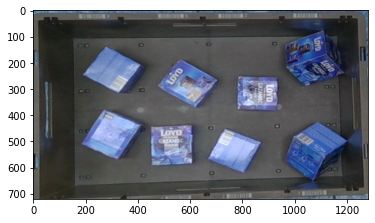

In [38]:
plt.imshow(img)
plt.show()

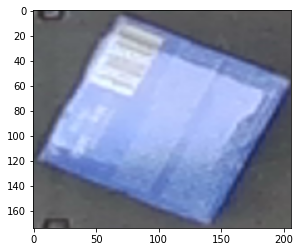

In [39]:
bbox_img = img[bbox[1]:bbox[1]+bbox[3], bbox[0]:bbox[0]+bbox[2]]
plt.imshow(bbox_img)
plt.show()

In [44]:
max_dim_size = max(bbox[2], bbox[3])

In [45]:
max_dim_size

206

In [54]:
x_dim_shortage, y_dim_shortage = max_dim_size - bbox[2], max_dim_size - bbox[3]

In [55]:
img_square = cv2.copyMakeBorder(
    bbox_img,
    top=int(y_dim_shortage/2),
    bottom=int(y_dim_shortage/2),
    left=int(x_dim_shortage/2),
    right=int(x_dim_shortage/2),
    borderType=cv2.BORDER_CONSTANT,
    value=[82, 82, 82]
)

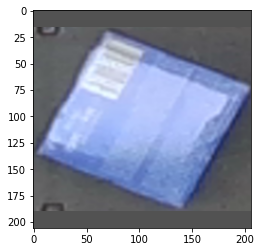

In [56]:
plt.imshow(img_square)
plt.show()

In [124]:
print('Original Dimensions : ',img.shape)

Original Dimensions :  (720, 1280, 3)


In [59]:
new_img_shape = (224, 224)

In [60]:
resized = cv2.resize(img_square, new_img_shape)

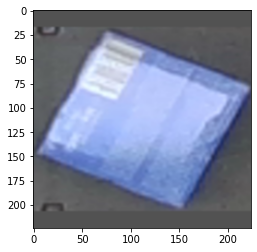

In [61]:
plt.imshow(resized)
plt.show()